In [1]:
%cd ~/REVIVAL2

/disk2/fli/REVIVAL2


In [2]:
%load_ext autoreload
%autoreload 2
%load_ext blackcellmagic

Loading BokehJS ...

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
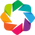

/disk2/fli/miniconda3/envs/SSMuLA/lib/python3.10/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


In [3]:
import os
from glob import glob
import pandas as pd
from scipy.stats import spearmanr

import matplotlib.pyplot as plt

from REVIVAL.vis_param import FZL_PALETTES
from REVIVAL.util import get_file_name

In [4]:
%matplotlib inline

In [5]:
ZS_OPTS = ["hd", "ev_score", "esm_score", "esmif_score", "coves_score", "Triad_score"]
ZS_OPT_MAP = {
    "hd": "Hamming distance",
    "ev_score": "EVmutation",
    "esm_score": "ESM",
    "esmif_score": "ESM-IF",
    "coves_score": "CoVES",
    "triad_score": "Triad",
}

/tmp/ipykernel_4009154/2931708642.py:116: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ZS_OPT_MAP.values(), rotation=90, ha="center")


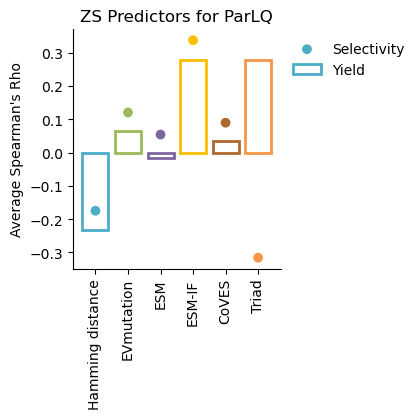

/tmp/ipykernel_4009154/2931708642.py:116: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ZS_OPT_MAP.values(), rotation=90, ha="center")


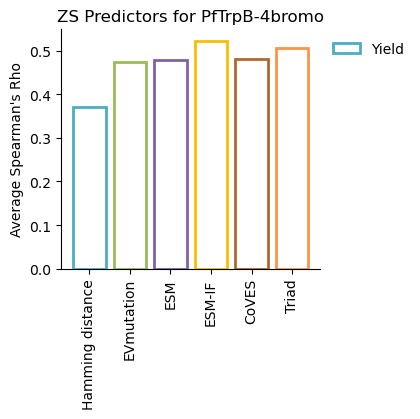

/tmp/ipykernel_4009154/2931708642.py:116: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ZS_OPT_MAP.values(), rotation=90, ha="center")


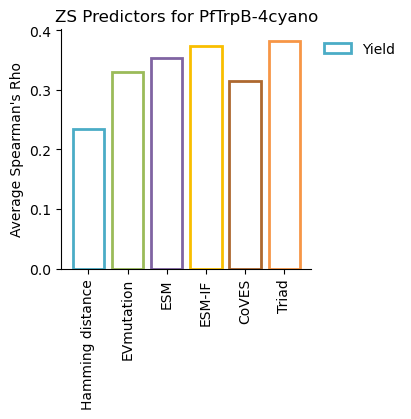

/tmp/ipykernel_4009154/2931708642.py:116: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ZS_OPT_MAP.values(), rotation=90, ha="center")


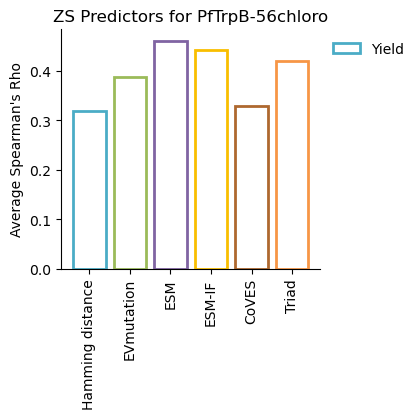

/tmp/ipykernel_4009154/2931708642.py:116: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ZS_OPT_MAP.values(), rotation=90, ha="center")


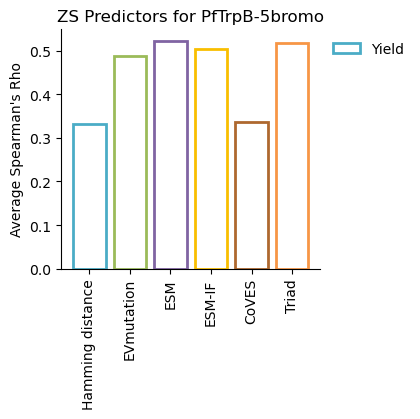

/tmp/ipykernel_4009154/2931708642.py:116: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ZS_OPT_MAP.values(), rotation=90, ha="center")


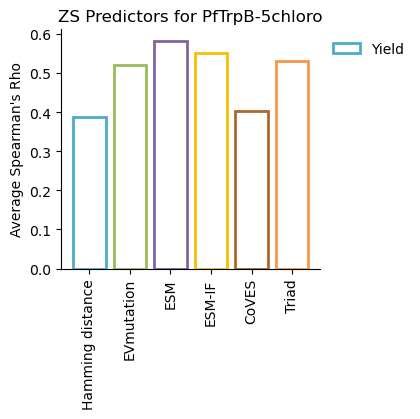

/tmp/ipykernel_4009154/2931708642.py:116: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ZS_OPT_MAP.values(), rotation=90, ha="center")


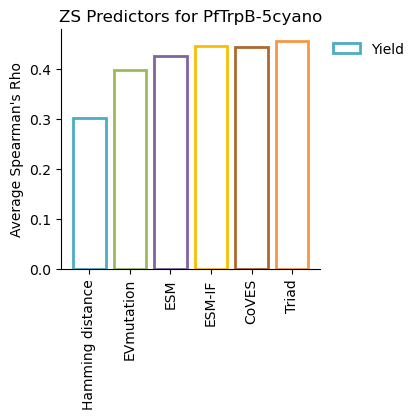

/tmp/ipykernel_4009154/2931708642.py:116: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ZS_OPT_MAP.values(), rotation=90, ha="center")


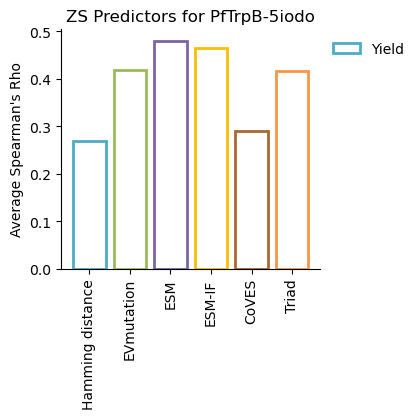

/tmp/ipykernel_4009154/2931708642.py:116: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ZS_OPT_MAP.values(), rotation=90, ha="center")


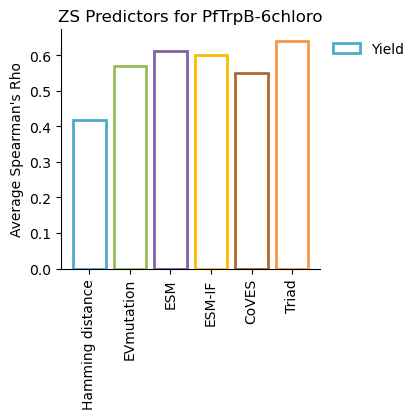

/tmp/ipykernel_4009154/2931708642.py:116: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ZS_OPT_MAP.values(), rotation=90, ha="center")


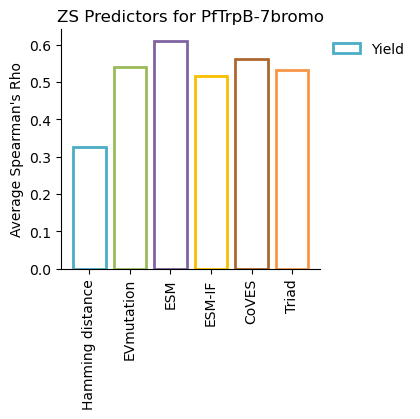

/tmp/ipykernel_4009154/2931708642.py:116: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ZS_OPT_MAP.values(), rotation=90, ha="center")


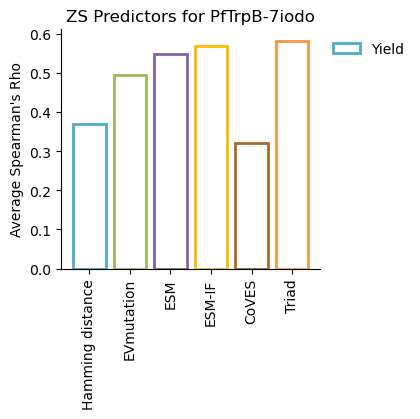

/tmp/ipykernel_4009154/2931708642.py:116: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ZS_OPT_MAP.values(), rotation=90, ha="center")


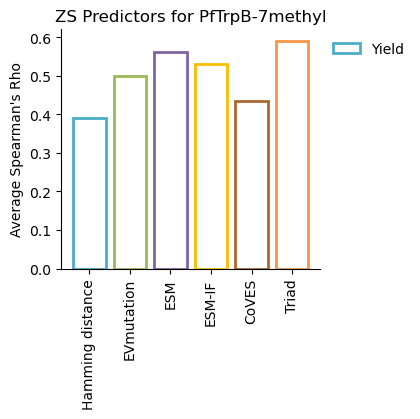

/tmp/ipykernel_4009154/2931708642.py:116: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ZS_OPT_MAP.values(), rotation=90, ha="center")


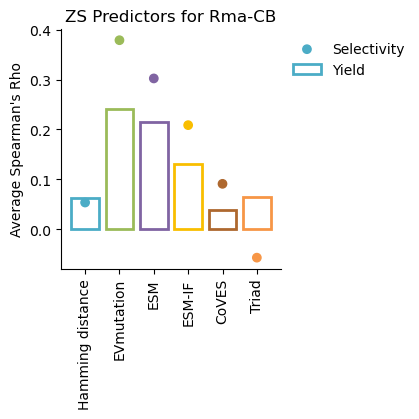

/tmp/ipykernel_4009154/2931708642.py:116: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ZS_OPT_MAP.values(), rotation=90, ha="center")


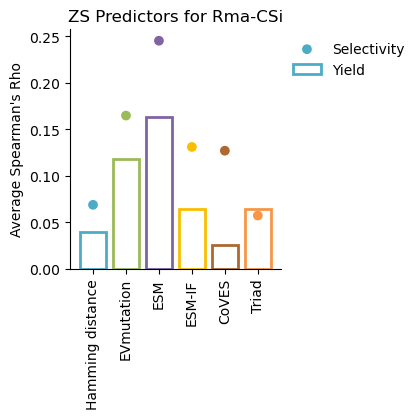

In [15]:
# loop all datasets to get spearmanr between esm_score and fitness
datasets = sorted(glob("/disk2/fli/REVIVAL2/zs/comb/*.csv"))
# get substrate name 
for d in datasets:
    lib = get_file_name(d)
    df = pd.read_csv(d)

    # Plotting
    # Create a new figure and axis
    fig, ax = plt.subplots(figsize=(4, 4))

    # Perform t-tests between each pair of ZS predictors within the metric
    
    rho_values = []
    p_values = []

    selectivity_rho_values = []
    selectivity_p_values = []

    for i, zs in enumerate(ZS_OPTS):
        
        factor = 1
        
        if "Triad" in zs:
            factor = -1
        
        rho, p = spearmanr(df["fitness"], factor*df[zs])
        rho_values.append(rho)
        p_values.append(p)

        if "selectivity" in df.columns:
            selectivity_rho, selectivity_p = spearmanr(df["selectivity"], df[zs])
            selectivity_rho_values.append(selectivity_rho)
            selectivity_p_values.append(selectivity_p)

    bars = ax.bar(
        ZS_OPTS,
        rho_values,
        # yerr=slice_merge_df.loc["std"].to_list(),
        capsize=4,
        edgecolor=[
            FZL_PALETTES[c]
            for c in ["blue", "green", "purple", "yellow", "brown", "orange"]
        ],
        linewidth=2,
        facecolor='none',
        width=0.8,
        error_kw={'ecolor': 'gray', 'capthick': 1},
        label = "Yield"
        
    )

    # add a line for average
    # ax.axhline(y=sum(rho_values) / len(rho_values), color="gray", linestyle="solid", label = "Yield")

    # add legend for average yield
    # ax.legend(
    #     ["Yield", "Average Yield"],
    #     loc="upper left",
    #     bbox_to_anchor=(1, 1),
    #     frameon=False,
    # )

    # make the font size smaller

    # Annotating p-values
    # for i, p_value in enumerate(p_values):
    #     if p_value < 0.05:
    #         ax.text(i, max(rho_values) * 1.05, "*", ha="center", color="gray")

    # overlay dots for selectivity
    if "selectivity" in df.columns:
        ax.scatter(
            range(len(ZS_OPTS)),
            selectivity_rho_values,
            color=[
                FZL_PALETTES[c]
                for c in ["blue", "green", "purple", "yellow", "brown", "orange"]
            ],
            zorder=10,
            label = "Selectivity"
        )

        # add a line for average
        # ax.axhline(
        #     y=sum(selectivity_rho_values) / len(selectivity_rho_values),
        #     color="gray",
        #     linestyle="dotted",
        #     label = "Selectivity"
        # )


        # append legend for ee
        # ax.legend(
        #     ["Selectivity", "Average selectivity"],
        #     loc="upper left",
        #     bbox_to_anchor=(1, 1),
        #     frameon=False,
        # )
        
        
    # annotating the p-values for selectivity
    # for i, p_value in enumerate(selectivity_p_values):
    #     if p_value < 0.05:
    #         ax.text(i, max(selectivity_rho_values) * 1.05, "x", ha="center", color="gray")

    # Set the title and labels
    ax.set_title("ZS Predictors for " + lib)
    # set legend location
    ax.legend(
        # ["Yield", "Selectivity"],
        loc="upper left",
        bbox_to_anchor=(1, 1),
        frameon=False,
    )
    ax.set_xticklabels(ZS_OPT_MAP.values(), rotation=90, ha="center")
    ax.set_ylabel("Average Spearman's Rho")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.xaxis.grid(False)
    ax.yaxis.grid(False)  # Disable the y-axis grid lines

    plt.tight_layout(pad=.0, h_pad=-.0, w_pad=1.0)
    plt.show()
    plt.close(fig)
    